Einstellen bei Oekofen: oekofen_puffertemp_min_ein_TPO 60.0
Einstellen bei Oekofen: oekofen_Abschaltueberhoehung_2 5.0
Einstellen bei Oekofen: oekofen_puffertemp_min_aus_TPM 60.0
Einstellen bei Oekofen: oekofen_Abschaltueberhoehung_1 10.0


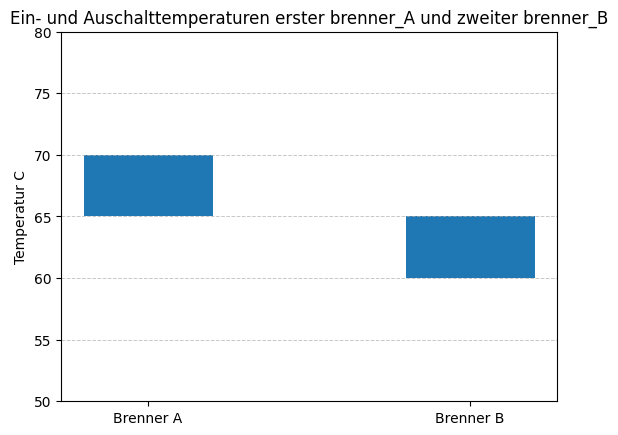

In [1]:
class Temperaturen:
    '''ich waehle'''
    TPO_ein_A_C = 65.0 # Einschalttemperatur erster Brenner, A
    TPM_aus_A_C = 70.0 # Ausschalttemperatur erster Brenner, A
    TPO_ein_B_C = 60.0 # Einschalttemperatur zweiter Brenner, B
    TPM_aus_B_C = 65.0 # Ausschalttemperatur zweiter Brenner, B

    def __init__(self) -> None:
        self.oekofen_puffertemp_min_ein_TPO = self.TPO_ein_B_C
        self.oekofen_Abschaltueberhoehung_2 = self.TPO_ein_A_C - self.oekofen_puffertemp_min_ein_TPO
        self.oekofen_puffertemp_min_aus_TPM = self.TPM_aus_B_C - self.oekofen_Abschaltueberhoehung_2
        self.oekofen_Abschaltueberhoehung_1 = self.TPM_aus_A_C - self.oekofen_puffertemp_min_aus_TPM

        print(f'Einstellen bei Oekofen: oekofen_puffertemp_min_ein_TPO {self.oekofen_puffertemp_min_ein_TPO}')
        print(f'Einstellen bei Oekofen: oekofen_Abschaltueberhoehung_2 {self.oekofen_Abschaltueberhoehung_2}')
        print(f'Einstellen bei Oekofen: oekofen_puffertemp_min_aus_TPM {self.oekofen_puffertemp_min_aus_TPM}')
        print(f'Einstellen bei Oekofen: oekofen_Abschaltueberhoehung_1 {self.oekofen_Abschaltueberhoehung_1}')

t = Temperaturen()

import matplotlib.pyplot as plt
labels = ['Brenner A', 'Brenner B']
bottoms = [t.TPO_ein_A_C, t.TPO_ein_B_C]  # Untere Grenze der Balken
heights = [t.TPM_aus_A_C - t.TPO_ein_A_C, t.TPM_aus_B_C - t.TPO_ein_B_C]  # Höhe der Balken
plt.bar(labels, heights, bottom=bottoms, width=0.4)
plt.ylim(50, 80)
plt.ylabel('Temperatur C')
plt.title('Ein- und Auschalttemperaturen erster brenner_A und zweiter brenner_B')
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()

In [2]:
import math

def linspace(start, end, num):
    """Generates linearly spaced values between start and end."""
    if num == 1:
        return [start]
    step = (end - start) / (num - 1)
    return [start + step * i for i in range(num)]

def inverse_distance_weighting(x, y, points, power=2, epsilon=1e-6):
    """Interpolates value at (x, y) using Inverse Distance Weighting."""
    numerator = 0
    denominator = 0
    for (xi, yi, qi) in points:
        distance = math.sqrt((x - xi)**2 + (y - yi)**2)
        if distance < epsilon:  # If very close to a point
            return qi
        weight = 1 / (distance ** power)
        numerator += weight * qi
        denominator += weight
    return numerator / denominator if denominator != 0 else 0

def get_interpolated_value(x, y, temp_ein_C, temp_aus_C):
    """
    Interpolates the value at (x, y) based on given temperature thresholds.

    Args:
        x (float): x-coordinate for interpolation.
        y (float): y-coordinate for interpolation.
        temp_ein_C (float): Threshold temperature for activation.
        temp_aus_C (float): Threshold temperature for deactivation.

    Returns:
        float: Interpolated value at (x, y).
    """
    offset = 1.0
    lines = [
        (0, temp_ein_C, temp_aus_C-offset, temp_ein_C, 0), 
        (temp_aus_C, 100, temp_aus_C, temp_ein_C+offset, 100), 
        (temp_aus_C-offset, temp_ein_C+offset, 0, 100, 50), 
        (0, 1, 1, 0, -100),
        (0, temp_ein_C-11.0, 60, 18, -40),
        (temp_aus_C+10.0, 100, 94, 43, 150),
        (90, 100, 100, 90, 180),
        (99, 100, 100, 99, 200),
    ]

    points = []
    for (x1, y1, x2, y2, value) in lines:
        num_points = 50
        xi = linspace(x1, x2, num_points)
        yi = linspace(y1, y2, num_points)
        for j in range(num_points):
            points.append((xi[j], yi[j], value))

    # Compute the interpolated value at (x, y)
    return inverse_distance_weighting(x, y, points, power=2, epsilon=1e-6)

# Beispielaufruf
x_value = 40  # Beispiel x-Koordinate
y_value = 65  # Beispiel y-Koordinate
temp_ein_C = 65
temp_aus_C = 65

z_value = get_interpolated_value(x_value, y_value, temp_ein_C, temp_aus_C)
print(f"Interpolierter Wert bei ({x_value}, {y_value}): {z_value}")

def plot_interpolation(brennernamen, temp_ein_C, temp_aus_C):
    """Generates and plots the interpolation based on temperature thresholds."""
    # Define interpolation grid
    min_x = -20
    max_x = 120
    min_y = -20
    max_y = 120

    grid_size = 100
    X_values = linspace(min_x, max_x, grid_size)
    Y_values = linspace(min_y, max_y, grid_size)

    X, Y = meshgrid(X_values, Y_values)

    Z = []
    for i, y_row in enumerate(Y):
        Z_row = []
        for j, x in enumerate(X[0]):
            interpolated_value = get_interpolated_value(x, y_row[j], temp_ein_C, temp_aus_C)
            Z_row.append(interpolated_value)
        Z.append(Z_row)

    levels = list(range(-100, 200, 10))

    plt.figure(figsize=(10, 6))
    plt.title(f"Ladung Speicher Zentral, {brennernamen}, unter 0: schaltet ein, ueber 100: schaltet aus")
    plt.imshow(Z, extent=(min_x, max_x, min_y, max_y), origin='lower', cmap='viridis', aspect='auto')
    plt.colorbar(label='Ladung')
    contour = plt.contour(X[0], Y, Z, levels=levels, colors='black', linewidths=0.8)
    plt.clabel(contour, inline=True, fontsize=8, fmt='%1.1f', colors='black')
    plt.xlabel("TPM_C")
    plt.ylabel("TPO_C")
    plt.plot([0, 100], [0, 100], color='red', linewidth=1)
    plt.fill_between(x=linspace(0, 100, 500), y1=0, y2=linspace(0, 100, 500), 
                     where=[True]*500, facecolor='none', hatch='\\', edgecolor='red', alpha=1, zorder=4)
    plt.show()

plot_interpolation(brennernamen='brenner_A', temp_ein_C=t.TPO_ein_A_C, temp_aus_C=t.TPM_aus_A_C)
#plot_interpolation(brennernamen='brenner_B', temp_ein_C=t.TPO_ein_B_C, temp_aus_C=t.TPM_aus_B_C)

Interpolierter Wert bei (40, 65): 2.4600773733824584


NameError: name 'meshgrid' is not defined